In [45]:
def MACD(df):
    exp1 = df.last_price.ewm(span=12, adjust=False).mean()
    exp2 = df.last_price.ewm(span=26, adjust=False).mean()
    macd = exp1-exp2
    return macd

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("reddy_historical.csv")

In [39]:
df.head()

,Unnamed: 0,co_code,tradedate,dayopen,dayhigh,daylow,last_price,volume
0,0,815,10/17/2006 12:00:00 AM,717.0,726.0,711.00,714.80,270717
1,1,815,10/18/2006 12:00:00 AM,715.0,737.9,710.20,733.70,454313
2,2,815,10/19/2006 12:00:00 AM,741.9,746.8,718.10,730.85,697622
3,3,815,10/20/2006 12:00:00 AM,724.0,738.7,720.05,726.05,214133
4,4,815,10/21/2006 12:00:00 AM,733.0,733.0,719.05,721.30,47851


In [40]:
df = pd.concat([df["tradedate"],df["last_price"]],axis =1)

In [41]:
df.head()

,tradedate,last_price
0,10/17/2006 12:00:00 AM,714.80
1,10/18/2006 12:00:00 AM,733.70
2,10/19/2006 12:00:00 AM,730.85
3,10/20/2006 12:00:00 AM,726.05
4,10/21/2006 12:00:00 AM,721.30


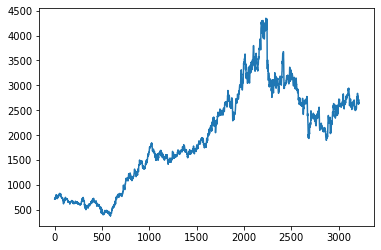

In [43]:
plt.plot(df["last_price"])

In [51]:
m = MACD(df)
exp3 = m.ewm(span=9, adjust=False).mean()

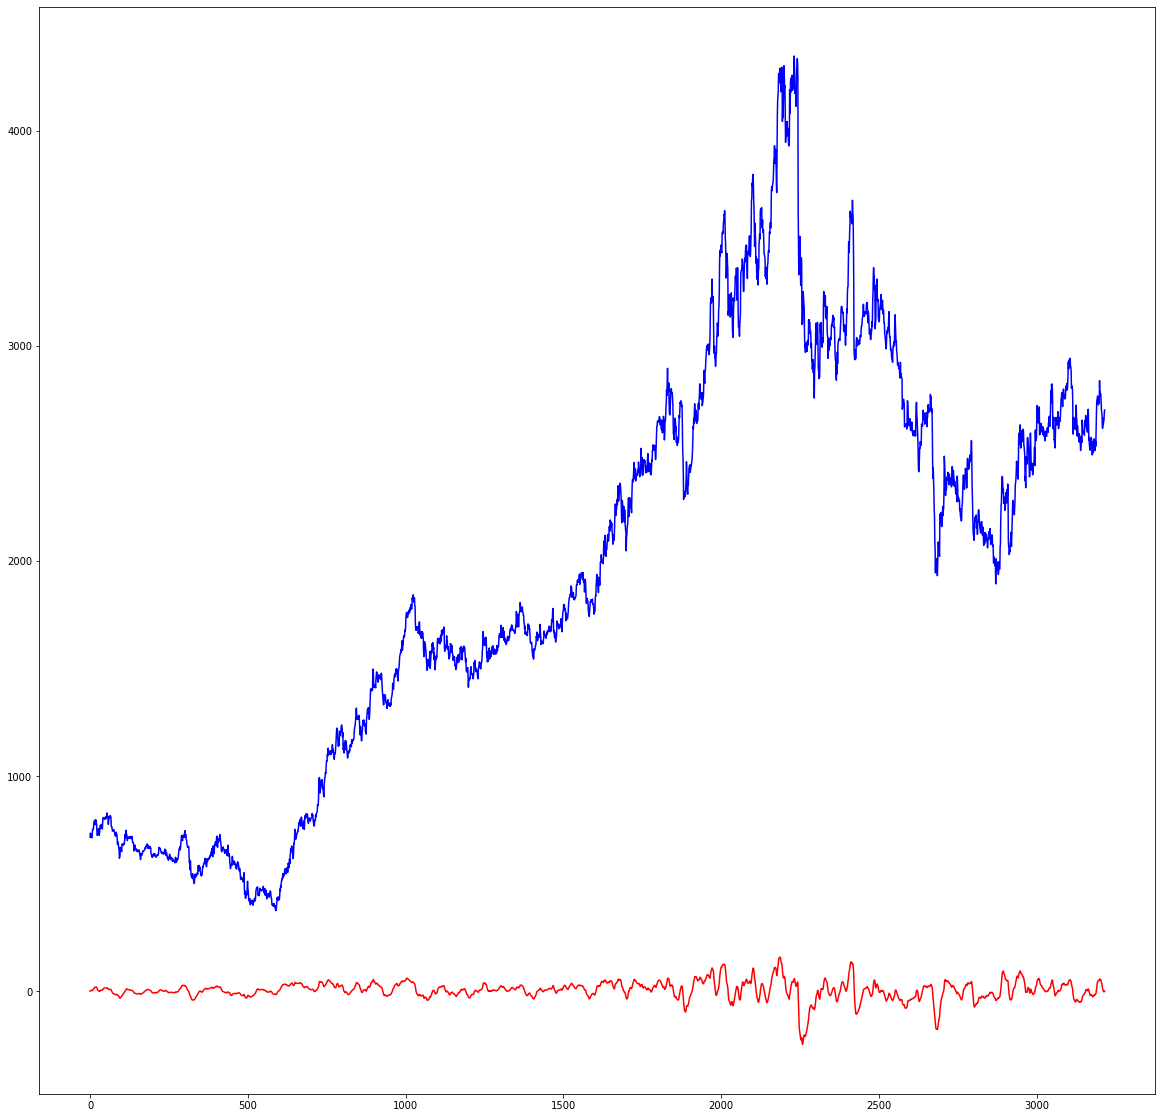

In [61]:
plt.figure(figsize=(20,20))
plt.plot(m,color = 'red')
#plt.plot(exp3,color='green')
plt.plot(df["last_price"],color = "blue")

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 2 columns):
tradedate     3216 non-null object
last_price    3216 non-null float64
dtypes: float64(1), object(1)
memory usage: 50.4+ KB


In [4]:
df.columns

Index(['Unnamed: 0', 'co_code', 'tradedate', 'dayopen', 'dayhigh', 'daylow',
       'last_price', 'volume'],
      dtype='object')

In [5]:
df = df.drop(columns=["Unnamed: 0","co_code","tradedate"])

In [6]:
df.columns

Index(['dayopen', 'dayhigh', 'daylow', 'last_price', 'volume'], dtype='object')

In [7]:
df.columns = ["open","high","low","close","volume"]

In [76]:
!pip install finta

In [8]:
from finta import TA

In [14]:
df1=pd.concat([df["open"],df["high"],df["low"],df["close"]],axis=1)

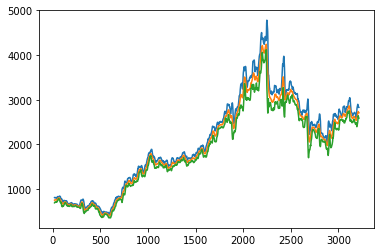

In [18]:
plt.plot(TA.BBANDS(df1))